## 神经网络

In [85]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

In [86]:
torch.set_printoptions(edgeitems=2, linewidth=75)

In [87]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [88]:
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

In [89]:
t_u.shape

torch.Size([11, 1])

In [90]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [91]:
t_un_val.shape

torch.Size([2, 1])

In [92]:
import torch.nn as nn

# 参数表示传入和输出的Tensor的大小
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[-6.3073],
        [-2.8637]], grad_fn=<AddmmBackward0>)

In [93]:
linear_model.weight

Parameter containing:
tensor([[-0.9982]], requires_grad=True)

In [94]:
linear_model.bias

Parameter containing:
tensor([0.5200], requires_grad=True)

In [95]:
# 批量训练方法
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.4781],
        [-0.4781],
        [-0.4781],
        [-0.4781],
        [-0.4781],
        [-0.4781],
        [-0.4781],
        [-0.4781],
        [-0.4781],
        [-0.4781]], grad_fn=<AddmmBackward0>)

In [96]:
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2
)

list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.9982]], requires_grad=True),
 Parameter containing:
 tensor([0.5200], requires_grad=True)]

In [97]:
def train_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(
                f"Epoch {epoch}, Training loss {loss_train.item():.4f}, "
                f"Validation loss {loss_val.item():.4f}"
            )

In [98]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [99]:
linear_model == nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2
)

In [100]:
train_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=loss_fn,
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

Epoch 1, Training loss 325.0139, Validation loss 390.0370
Epoch 1000, Training loss 3.7898, Validation loss 4.2511
Epoch 2000, Training loss 2.6718, Validation loss 4.8343
Epoch 3000, Training loss 2.6295, Validation loss 5.1599


In [101]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [102]:
from collections import OrderedDict

seq_model = nn.Sequential(
    OrderedDict([
        ('hidden_linear', nn.Linear(1, 8)),
        ('hidden_activation', nn.Tanh()),
        ('output_linear', nn.Linear(8, 1))
    ])
)

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [103]:
optimizer = optim.SGD(
    seq_model.parameters(),
    lr = 1e-4
)

train_loop(
    n_epochs = 100000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val
)

Epoch 1, Training loss 190.1591, Validation loss 238.1041
Epoch 1000, Training loss 68.7740, Validation loss 84.9406
Epoch 2000, Training loss 51.0189, Validation loss 58.5947
Epoch 3000, Training loss 37.5652, Validation loss 40.7365
Epoch 4000, Training loss 25.2967, Validation loss 25.5498
Epoch 5000, Training loss 17.5296, Validation loss 16.6619
Epoch 6000, Training loss 12.3650, Validation loss 11.9221
Epoch 7000, Training loss 9.3082, Validation loss 10.0295
Epoch 8000, Training loss 7.5030, Validation loss 8.9260
Epoch 9000, Training loss 6.2505, Validation loss 8.1978
Epoch 10000, Training loss 5.3269, Validation loss 7.6338
Epoch 11000, Training loss 4.6153, Validation loss 7.1576
Epoch 12000, Training loss 4.0519, Validation loss 6.7468
Epoch 13000, Training loss 3.5986, Validation loss 6.3938
Epoch 14000, Training loss 3.2308, Validation loss 6.0933
Epoch 15000, Training loss 2.9312, Validation loss 5.8406
Epoch 16000, Training loss 2.6869, Validation loss 5.6303
Epoch 1700

In [104]:
print("output ", seq_model(t_un_val))
print("answer ", t_c_val)
print("output ", seq_model.hidden_linear.weight.grad)

output  tensor([[20.4202],
        [-0.1729]], grad_fn=<AddmmBackward0>)
answer  tensor([[21.],
        [ 3.]])
output  tensor([[ 0.0067],
        [ 0.0050],
        [ 0.0060],
        [ 0.0072],
        [ 0.0203],
        [-0.0001],
        [ 0.0001],
        [ 0.0081]])


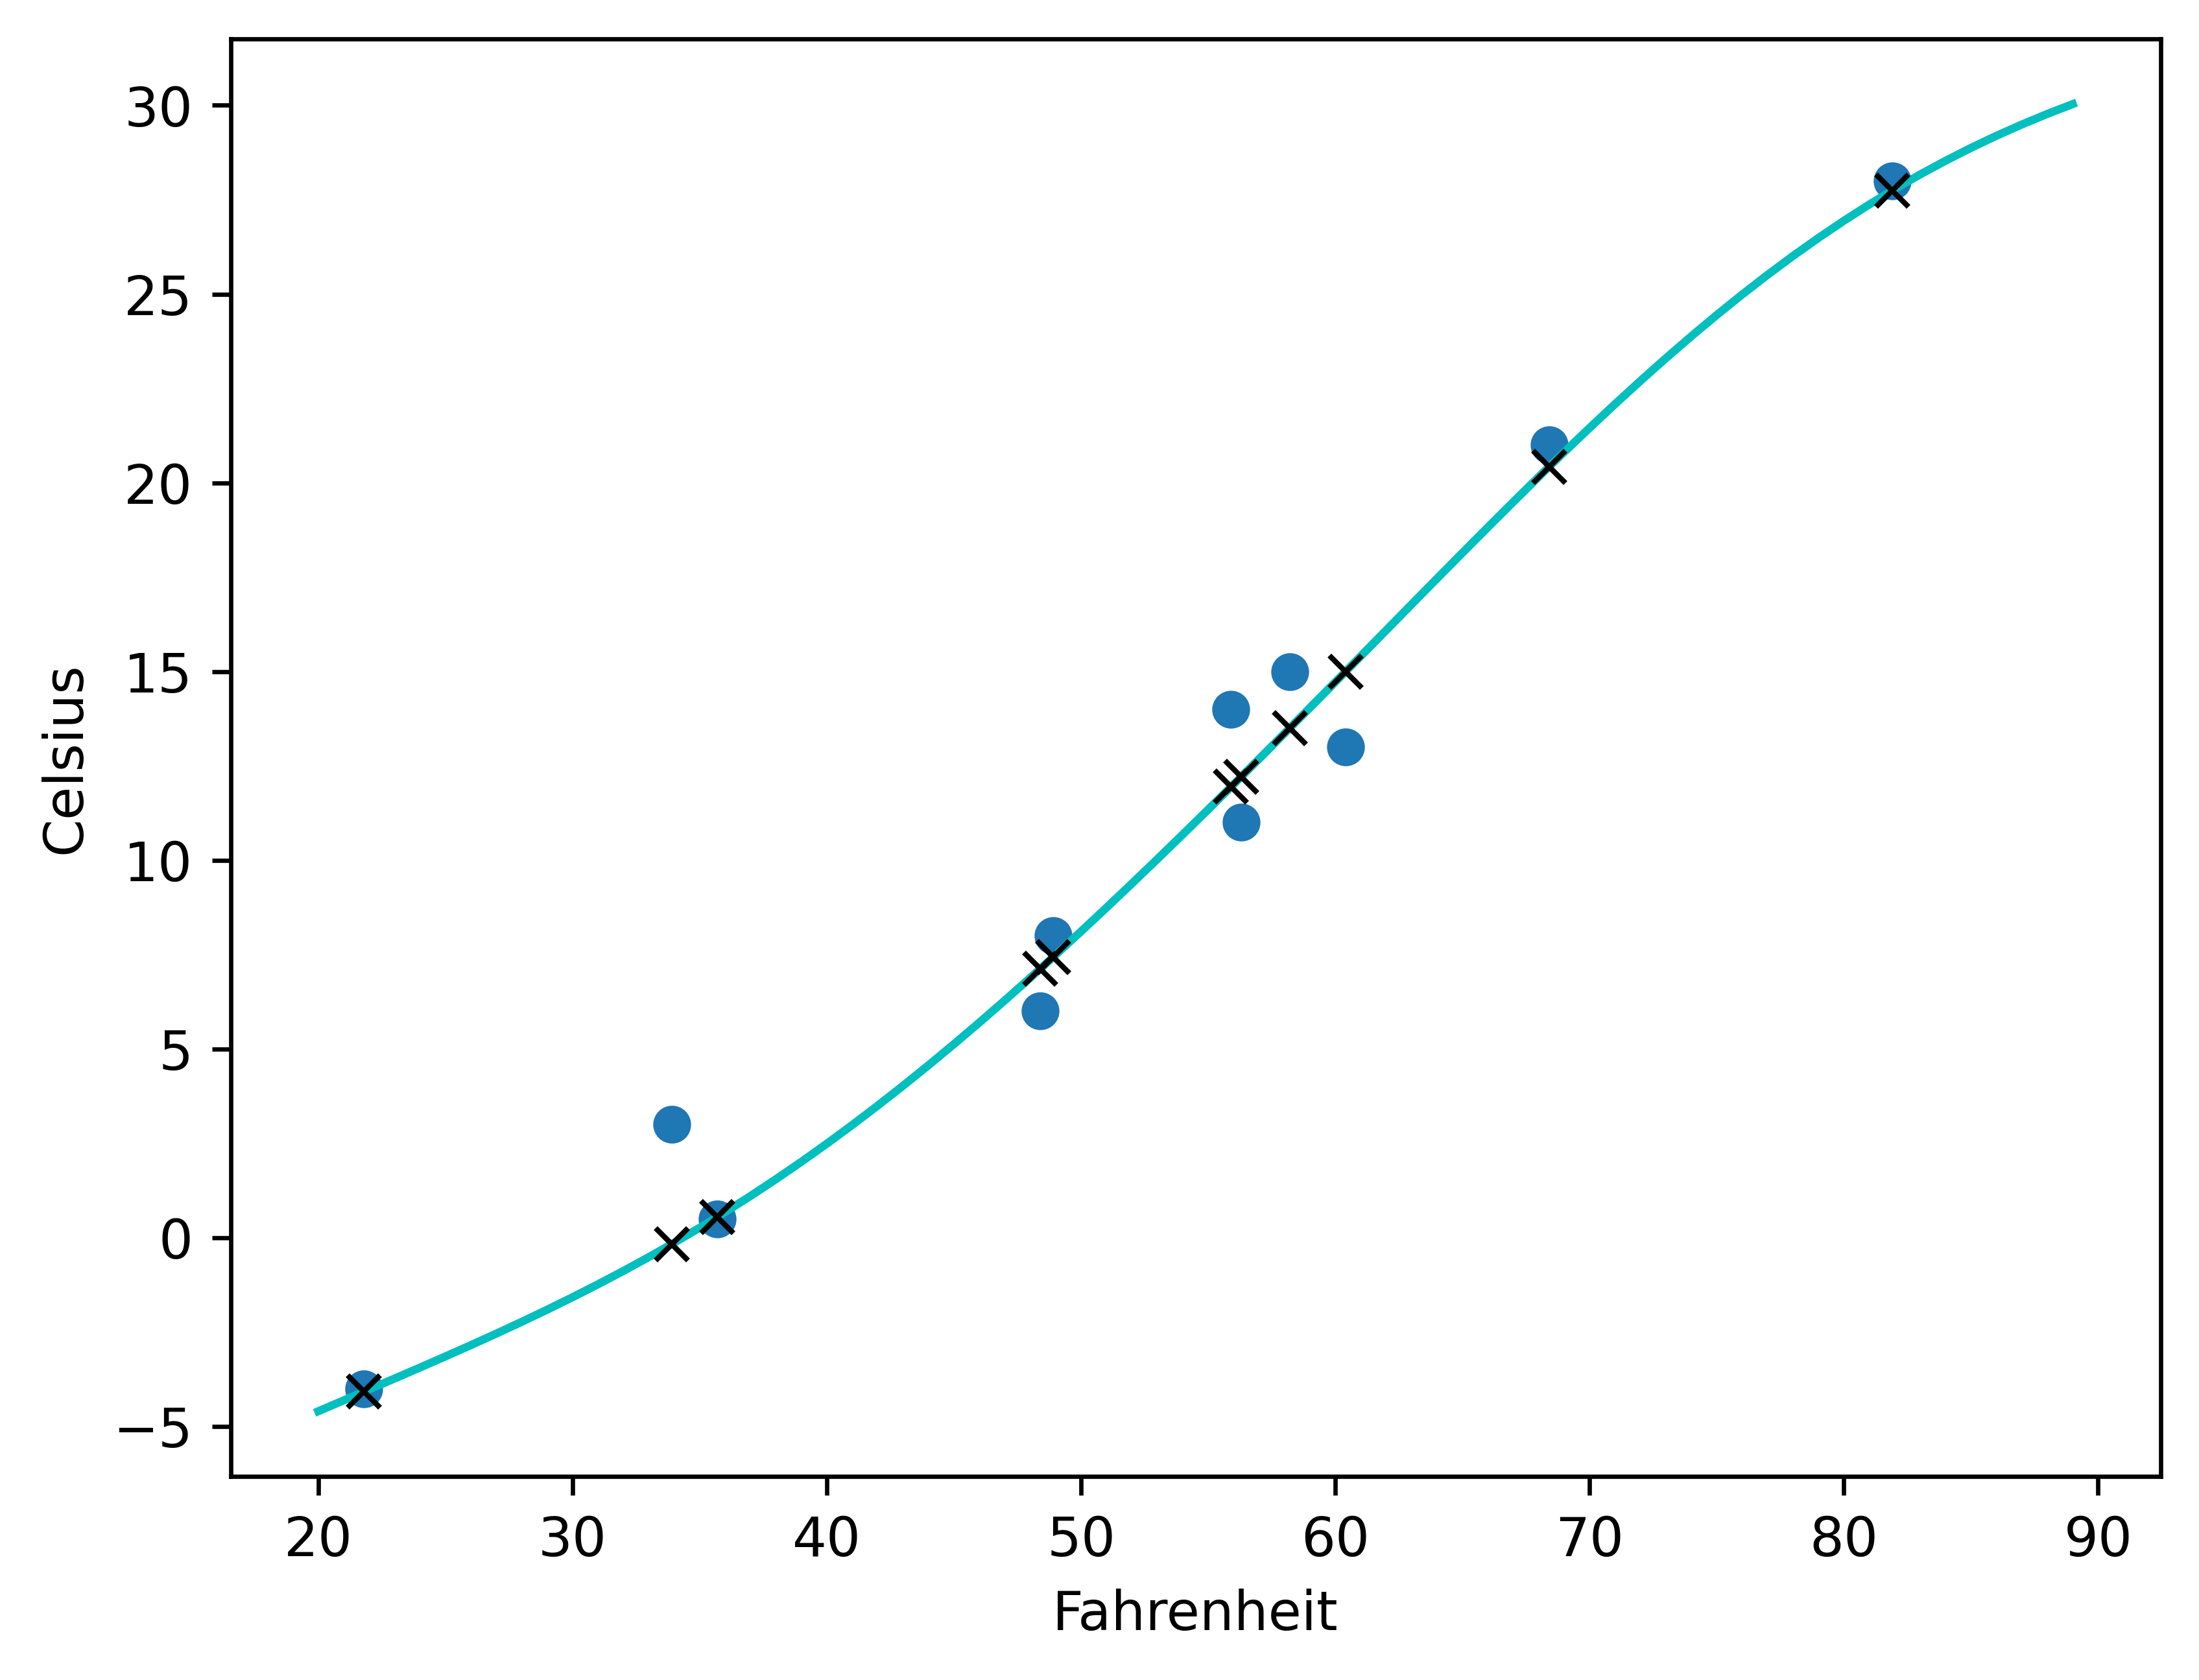

In [105]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(),seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
plt.show()